In [ ]:
## Import relevant libraries for data processing & visualisation

import numpy as np              # linear algebra
import pandas as pd             # data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization & graphical plotting
import seaborn as sns           # to visualize random distributions
%matplotlib inline
## Add additional libraries to prepare and run the model

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings                 # to deal with warning messages
warnings.filterwarnings('ignore')

In [ ]:
## Import the dataset to read and analyse
df_ins = pd.read_csv("/content/insurance_data.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/insurance_data.csv'

In [ ]:
#data cleaning:
##1.DATA CLEANING:
#Data cleaning which includes checking for duplicates in the data set and removes the duplicates from the dataset and display the status:

# Check the shape of DataFrame before removing duplicates
original_shape = df_ins.shape

#Data cleaning which includes checking for duplicates in the data set and removes the duplicates from the dataset and display the status:
# Remove duplicates
df_ins.drop_duplicates(inplace=True)

# Check the shape of DataFrame after removing duplicates
new_shape = df_ins.shape

# Check if duplicates were removed
if original_shape == new_shape:
    print("No duplicates found.")
else:
    print("Duplicates removed.")
# Optionally, you can save the cleaned DataFrame back to a CSV file
df_ins.to_csv('cleaned_file.csv', index=False)


No duplicates found.


In [ ]:
# checking the datasct contents, with head() function
df_ins.head()


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
#datapreparation

In [ ]:
## Checking the null values with isna() function
df_ins.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [ ]:
## interpolating the null values
df = df_ins.interpolate()                ## numerical features
df = df_ins.fillna(df.mode().iloc[0])    ## categorical features
df.isna().sum()                          ## check for any null values, after modifying

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [ ]:
#descriptive stastics:
#Descriptive statistics is a branch of statistics that deals with summarizing and describing features of a dataset.
# It provides insights into the central tendency, variability, and distribution of the data.
#Common measures of descriptive statistics include measures of central tendency (mean, median, mode), measures of variability (range, variance, standard deviation), and measures of distribution (skewness, kurtosis). Here's an overview of some key descriptive statistics measures:
## Having a more deeper look into the data, gauging descriptive data for each feature
df.describe(include='all').round(0)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1340.0,1340.0,1340.0,1340,1340.0,1340.0,1340,1340.0,1340,1340,1340.0
unique,NaN,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,NaN,678,NaN,NaN,698,NaN,1066,446,NaN
mean,670.0,670.0,38.0,NaN,31.0,94.0,NaN,1.0,NaN,NaN,13253.0
std,387.0,387.0,11.0,NaN,6.0,11.0,NaN,1.0,NaN,NaN,12110.0
min,0.0,1.0,18.0,NaN,16.0,80.0,NaN,0.0,NaN,NaN,1122.0
25%,335.0,336.0,29.0,NaN,26.0,86.0,NaN,0.0,NaN,NaN,4720.0
50%,670.0,670.0,38.0,NaN,30.0,92.0,NaN,1.0,NaN,NaN,9370.0
75%,1004.0,1005.0,47.0,NaN,35.0,99.0,NaN,2.0,NaN,NaN,16604.0


In [ ]:
## Checking the shape of the dataset
print("The number of rows and number of columns are ", df.shape)

The number of rows and number of columns are  (1340, 11)


In [ ]:
## Checking the labels in categorical features
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


gender
['male' 'female']

diabetic
['Yes' 'No']

smoker
['No' 'Yes']

region
['southeast' 'northwest' 'southwest' 'northeast']


In [ ]:
## Relabeling the categories in 'diabetic', 'smoker' variables appropriatly with .replace() function
## This helps in having a greater understanding of contents in charts & plots
df['diabetic'] = df['diabetic'].replace({'Yes': 'diabetic', 'No': 'non-diabetic'})
df['smoker'] = df['smoker'].replace({'Yes': 'smoker', 'No': 'non-smoker'})

In [ ]:
# Before proceeding to EDA, see the information about the DataFrame with .info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1340 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1340 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [ ]:
## First we will use pd.crosstab() to check the data in tabular format
pd.crosstab(df['region'], df['gender'], margins = True, margins_name = "Total").sort_values(by="Total", ascending=True)

gender,female,male,Total
region,,,
northeast,112,119,231
southwest,162,152,314
northwest,164,185,349
southeast,224,222,446
Total,662,678,1340


In [ ]:
#Since we have only 4 categories, we can quickly makeout some info from the table
#However, when categories number is high, itis difficult to gain insights from the table
#Thats' where visualising would be the better option

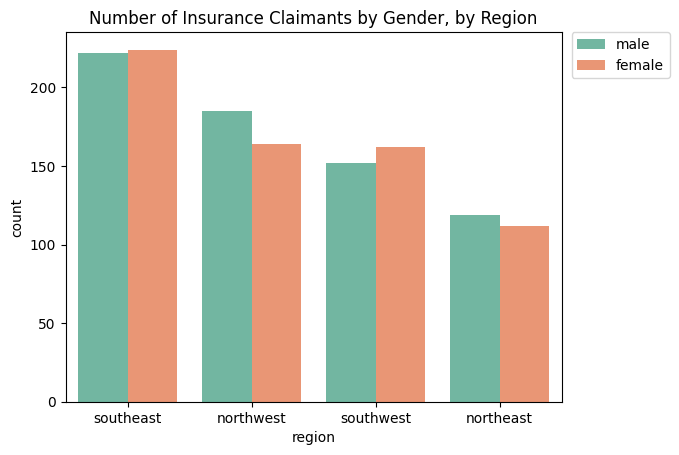

In [ ]:
## Now we use countplot() to visualise the data
sns.countplot(x='region', hue='gender', palette="Set2", data=df).
set(title='Number of Insurance Claimants by Gender, by Region')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
#The above plot revealts that southeast has higher claims overall
#southeast, southwest have higher female claims; northwest, northeast, have higher male claims

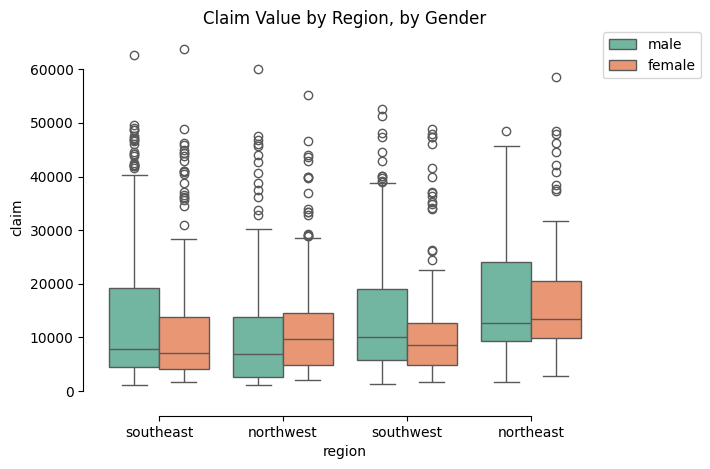

In [ ]:
sns.boxplot(x="region", y="claim",hue="gender", palette="Set2",data=df).
set(title='Claim Value by Region, by Gender')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

In [ ]:
#The plot revealts that claim median value lies in the rang of around
#10,000-15,000 for all the regions, for both the genders
#Claim value outliers are rampant for all the regions, for both the genders

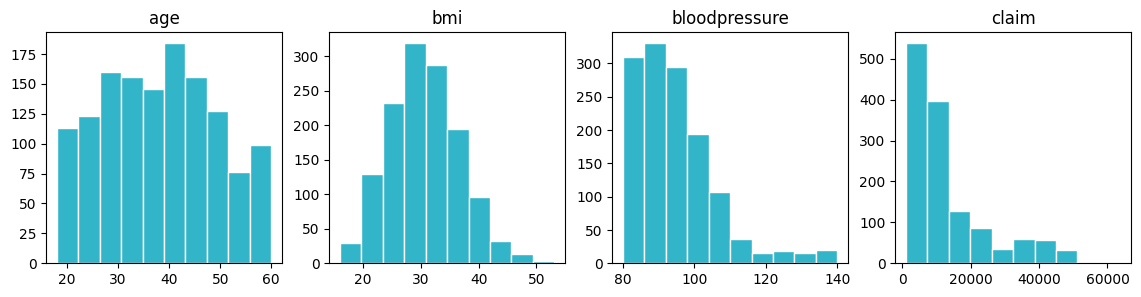

In [ ]:
## Generating histograms for numerical variables –– age, bmi, bloodpressure, claim
fig, axes = plt.subplots(1, 4, figsize=(14,3))
age = df.age.hist(ax=axes[0], color="#32B5C9", ec="white", grid=False).set_title('age')
bmi = df.bmi.hist(ax=axes[1], color="#32B5C9", ec="white", grid=False).set_title('bmi')
bloodpressure = df.bloodpressure.hist(ax=axes[2], color="#32B5C9", ec="white", grid=False).
set_title('bloodpressure')
claim = df.claim.hist(ax=axes[3], color="#32B5C9", ec="white", grid=False).set_title('claim')

In [ ]:
#Histograms generated show

#age of individuals is more or less equally distributed
#bmi displays a typical normal distribution
#bloodpressure & claims have higher positive skewness

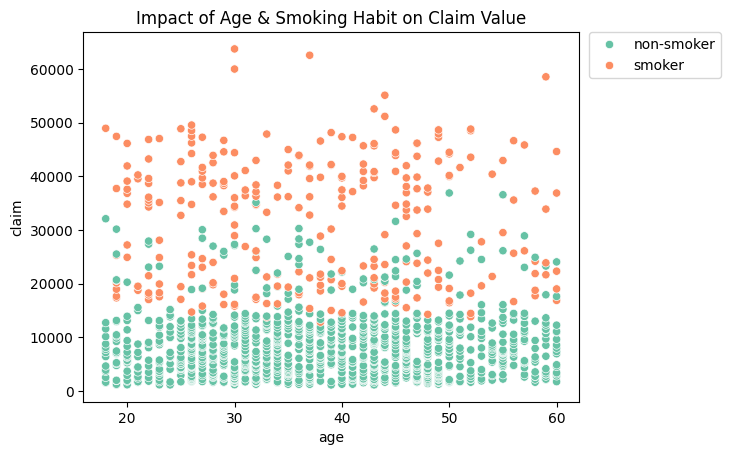

In [ ]:
## Scatterplots help in understanding the impact of habits & health conditions on insurance claim value
## Let us try analyse the impact of smoking habit and age on claim value
sns.scatterplot(x='age', y='claim', hue='smoker', palette="Set2", data=df).set(title='Impact of Age & Smoking Habit on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

In [ ]:
#The plot reveals that claim value is typiclly high for people with smoking habit

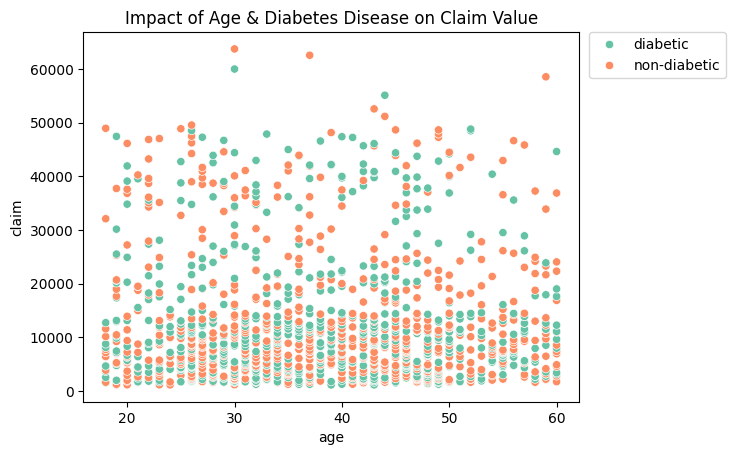

In [ ]:
## Impact of diabetes disease and age on claim value
sns.scatterplot(x='age', y='claim', hue='diabetic', palette="Set2", data=df).set(title='Impact of Age & Diabetes Disease on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

In [ ]:
#The plot reveals that there is no significant correlation between claim value and prevalence of diabetes

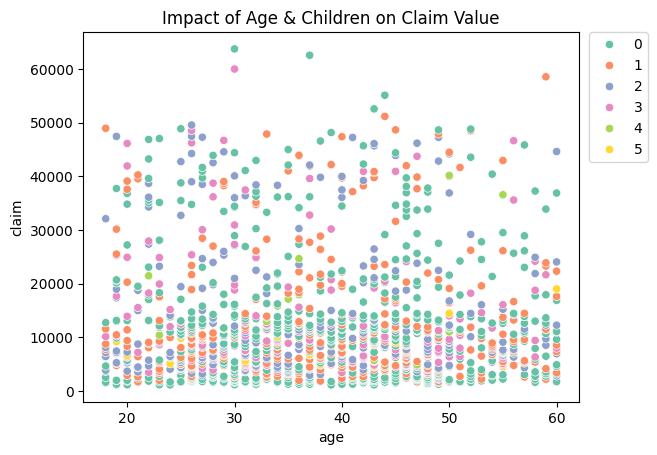

In [ ]:
## Impact of no. of children and age on claim value
sns.scatterplot(x='age', y='claim', hue='children', palette="Set2", data=df).set(title='Impact of Age & Children on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

In [ ]:
#The plot reveals that there is no significant correlation between claim value and number of children the claim holder has

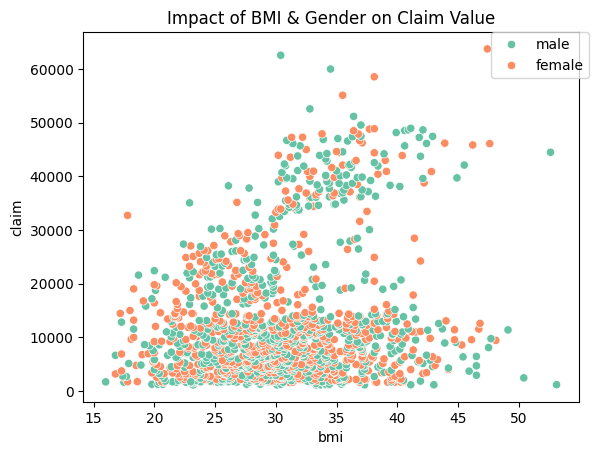

In [ ]:
## Impact of bmi on claim value, by gender
sns.scatterplot(x='bmi', y='claim', hue='gender', palette="Set2", data=df).set(title='Impact of BMI & Gender on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

In [ ]:
#The plot reveals that there is certain degree of correlation between claim value and bmi, in both male & female groups

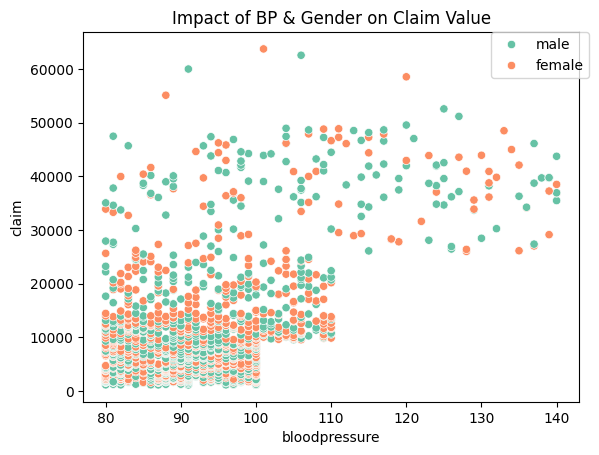

In [ ]:
## Impact of bloodpressure on claim value, by gender
sns.scatterplot(x='bloodpressure', y='claim', hue='gender', palette="Set2", data=df).set(title='Impact of BP & Gender on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

In [ ]:
## Pie charts help in determining the % share of each category in a feature variable
## First we will define colors for Pie chart (about 6 colors are sufficient here)
colors = ({'custom': 'turquoise', 'silver': 'silver', 'grey': 'grey', 'blue': 'blue', 'lightskyblue': 'lightskyblue', 'white': 'antiquewhite'})

In [ ]:
## Total claims by region
regions = df[['region', 'claim']].groupby('region').
sum().sort_values(by="claim", ascending=True)
regions

,claim
region,
northeast,3901369.33
southwest,3995062.77
northwest,4073558.87
southeast,5788688.19


array([<Axes: ylabel='claim'>], dtype=object)

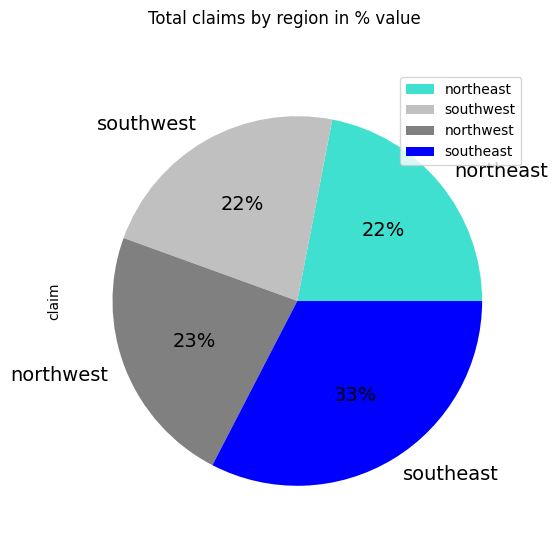

In [ ]:
regions.plot(kind='pie', subplots=True, figsize=(10,6),
      fontsize = 14, colors = colors.values(), title='Total claims by region in % value', autopct='%1.0f%%')

In [ ]:
## Total claims by gender
gender = df[['gender', 'claim']].groupby('gender').sum().sort_values(by="claim", ascending=True)
gender

,claim
gender,
female,8321061.23
male,9437617.93


array([<Axes: ylabel='claim'>], dtype=object)

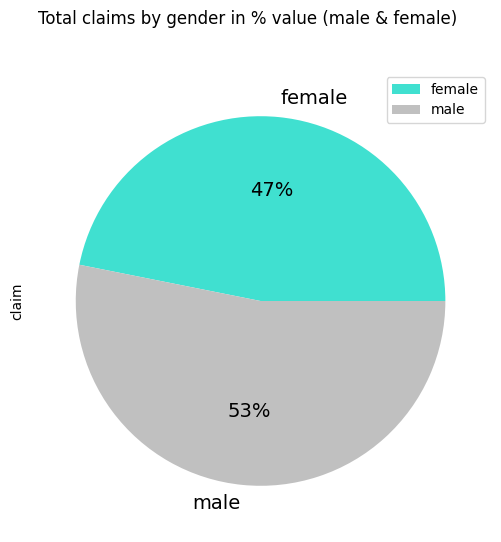

In [ ]:
gender.plot(kind='pie', subplots=True, figsize=(10,6), fontsize = 14, colors = colors.values(), title='Total claims by gender in % value (male & female)', autopct='%1.0f%%')

In [ ]:
## Total claims by smoking habit
smokers = df[['smoker', 'claim']].groupby('smoker').sum().sort_values(by="claim", ascending=True)
smokers

,claim
smoker,
smoker,8781763.56
non-smoker,8976915.60


array([<Axes: ylabel='claim'>], dtype=object)

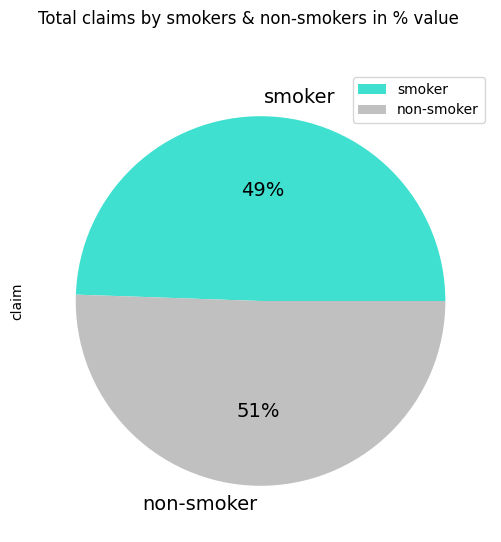

In [ ]:
smokers.plot(kind='pie', subplots=True, figsize=(10,6), fontsize = 14, colors = colors.values(), title='Total claims by smokers & non-smokers in % value', autopct='%1.0f%%')

In [ ]:
## Total claims by diabetes prevalence
diabetic = df[['diabetic', 'claim']].groupby('diabetic').sum().sort_values(by="claim", ascending=True)
diabetic

,claim
diabetic,
diabetic,8437564.83
non-diabetic,9321114.33


array([<Axes: ylabel='claim'>], dtype=object)

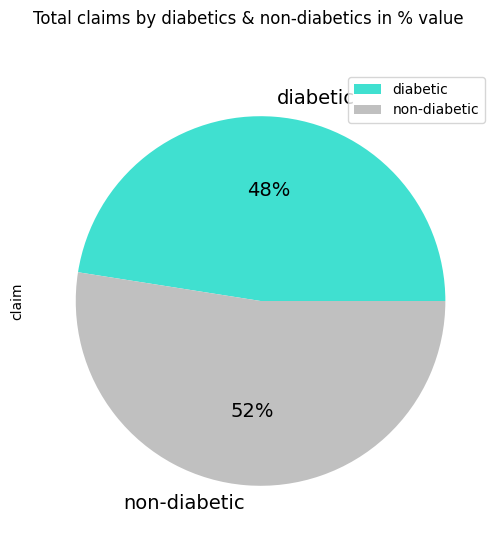

In [ ]:
diabetic.plot(kind='pie', subplots=True, figsize=(10,6),fontsize = 14, colors = colors.values(), title='Total claims by diabetics & non-diabetics in % value', autopct='%1.0f%%')

In [ ]:
## Total claims by number of children
children = df[['children', 'claim']].groupby('children').sum().sort_values(by="claim", ascending=True)
children
claim

Text(0.5, 1.0, 'claim')

array([<Axes: ylabel='claim'>], dtype=object)

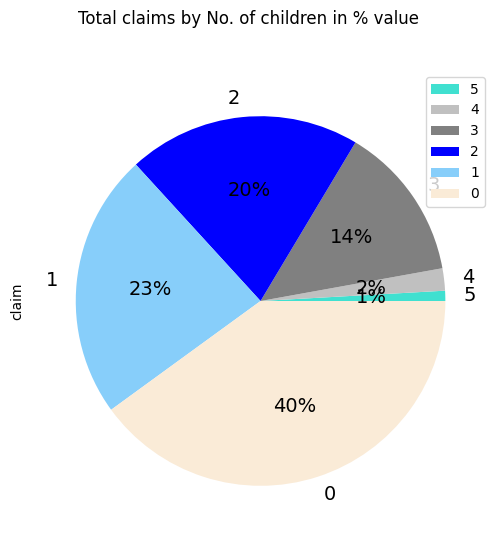

In [ ]:
children.plot(kind='pie', subplots=True, figsize=(10,6), fontsize = 14, colors = colors.values(), title='Total claims by No. of children in % value', autopct='%1.0f%%')

In [ ]:
#Building a Pie Chart with Age Groups
#We have age of individuals in our dataset, but we do not have age group.
#We create one, by binning using pd.cut() function
#Before proceeding we build a distribution plot to see age distribution in the dataset
#later we check minimum, maximum, average ages of the inviduals, for better understanding of ages

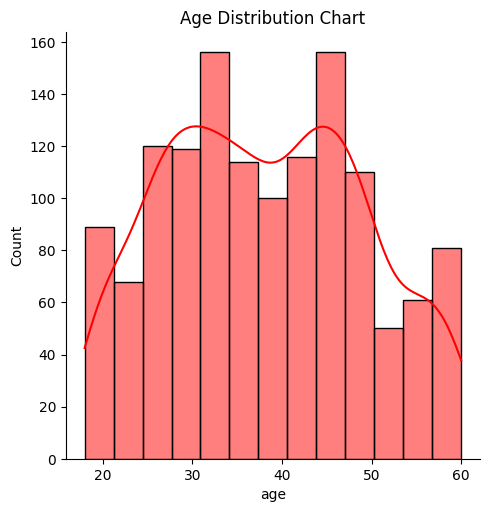

In [ ]:
## age distribution plot
sns.displot(df.age, color="r", kde=True).set(title='Age Distribution Chart')

In [ ]:
## min, max, mean ages
df['age'].agg(['min', 'max', 'mean']).round(0)

min     18.0
max     60.0
mean    38.0
Name: age, dtype: float64

In [ ]:
## Build a new ageGroup feature, with 6 age bands, of 7 years each
age_band = [18,25,32,39,46,53,60]
df['age_group'] = pd.cut(df['age'], bins=age_band)
ageGroup = df[['age_group', 'claim']].groupby('age_group').sum().sort_values(by="claim", ascending=False)
ageGroup

,claim
age_group,
"(25, 32]",3972132.28
"(39, 46]",3726873.10
"(32, 39]",3151344.51
"(46, 53]",2488434.04
"(18, 25]",2461805.34
"(53, 60]",1786511.82


array([<Axes: ylabel='claim'>], dtype=object)

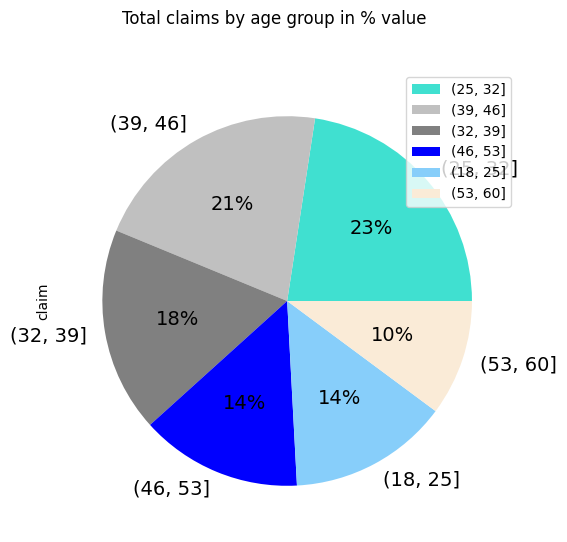

In [ ]:
## Total claims by age group
ageGroup.plot(kind='pie', subplots=True, figsize=(10,6), fontsize = 14, colors = colors.values(), title='Total claims by age group in % value', autopct='%1.0f%%')

In [ ]:
## Now we do some data modeling, model evaluation, and if possible some predictions.
## First we prepare the data to make predictions, and do some feature engineering as per the need
## Later load required additional libraries, and proceed with machine learning

## splitting Categorical and Numerical data
cat_df = df[['gender', 'diabetic', 'children', 'smoker', 'region']]
num_df = df[['age', 'bmi', 'bloodpressure', 'claim']]

In [ ]:
## label encoding
le = LabelEncoder ()

#select ctegorical columns
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

#joining the data to the numeric data
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

NameError: name 'LabelEncoder' is not defined

In [ ]:
main_df()

NameError: name 'main_df' is not defined

[Text(0.5, 1.0, 'Univariate Analysis : Claim Feature')]

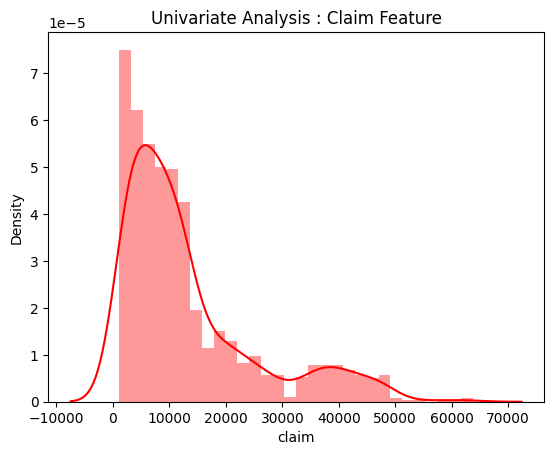

In [ ]:
## EDA-Univariate analysis to check "claim" feature, before proceeding with machine learning
sns.distplot(main_df.claim, color="r", kde=True).set(title='Univariate Analysis : Claim Feature')

In [ ]:
#The plot reveals that some outliers exist on higher as well as lower sides, we try to remove them in next step

In [ ]:
## Removing the outliers from claim feature
Q1 = np.percentile(main_df['claim'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(main_df['claim'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", main_df.shape)

# Upper bound
upper = np.where(main_df['claim'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(main_df['claim'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
main_df.drop(upper[0], inplace = True)
main_df.drop(lower[0], inplace = True)

print("New Shape: ", main_df.shape)

Old Shape:  (1340, 12)
New Shape:  (1201, 12)


[Text(0.5, 1.0, 'Univariate Analysis : Revised Claim  Feature')]

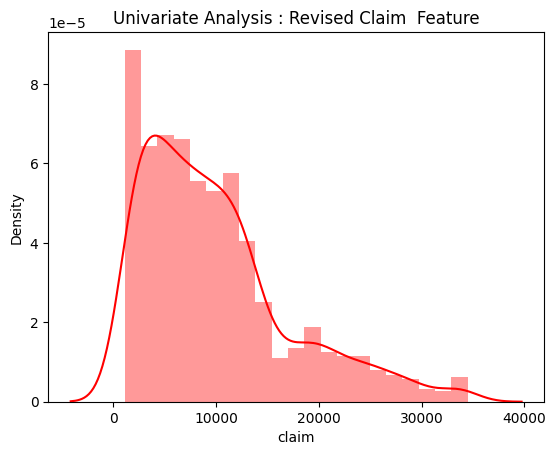

In [ ]:
## Re-running the Univariate analysis on revised "claim" feature
sns.distplot(main_df.claim, color="r", kde=True).set(title='Univariate Analysis : Revised Claim  Feature')

In [ ]:
#correlation between age and children
# Choose two attributes
attribute1 = 'age'
attribute2 = 'children'

# Compute correlation between the two attributes
correlation = df[attribute1].corr(df[attribute2])

# Display correlation
print(f'Correlation between {attribute1} and {attribute2}: {correlation}')


Correlation between age and children: -0.02700156601852667


In [ ]:
# Choose two attributes
attribute1 = 'claim'
attribute2 = 'age'

# Compute correlation between the two attributes
correlation = df[attribute1].corr(df[attribute2])

# Display correlation
print(f'Correlation between {attribute1} and {attribute2}: {correlation}')


Correlation between claim and age: -0.029504584700982127


In [ ]:


# Extract the columns of interest (e.g., 'Citable docs per Capita' and 'Energy Supply per Capita')
data = df_ins[['age', 'claim']]

# Calculate the Pearson correlation
correlation = data.corr(method='pearson')

# The correlation value is in the upper left corner of the resulting matrix
print(f"Pearson correlation: {correlation.iloc[0, 1]}")


Pearson correlation: -0.02790880975218848


In [ ]:

# Compute correlation matrix for all columns
correlation_matrix =main_df.corr()

# Stack the correlation matrix to create a series of correlations
correlation_series = correlation_matrix.stack()

# Sort the correlation series in ascending order
sorted_correlation = correlation_series.sort_values()

# Display sorted correlation coefficients
print("Correlation coefficients in increasing order:")
print(sorted_correlation)


Correlation coefficients in increasing order:
gender     age         -0.386540
age        gender      -0.386540
gender     age_group   -0.324500
age_group  gender      -0.324500
smoker     bmi         -0.255251
                          ...   
PatientID  PatientID    1.000000
           index        1.000000
index      PatientID    1.000000
region     region       1.000000
age_group  age_group    1.000000
Length: 144, dtype: float64


In [ ]:
#CORRELATION OF ALL THE COLUMNS WITH RESPECT TO ALL COLUMNS

In [ ]:

# Choose the fixed column and the changing column
fixed_column = 'claim'
changing_columns = main_df.columns[main_df.columns != fixed_column]

# Compute correlation between the fixed column and each changing column
correlation_results = {}
for column in changing_columns:
    correlation = main_df[fixed_column].corr(main_df[column])
    correlation_results[column] = correlation

# Convert dictionary to DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation'])

# Arrange columns in increasing order of correlation
sorted_correlation_df = correlation_df.sort_values(by='Correlation')

# Display sorted correlation DataFrame
print("Correlation coefficients in increasing order:")
print(sorted_correlation_df)


Correlation coefficients in increasing order:
               Correlation
region           -0.175016
bmi              -0.067404
gender           -0.026302
age_group        -0.018454
diabetic         -0.000576
age               0.001097
children          0.085305
bloodpressure     0.364260
smoker            0.602168
index             0.929188
PatientID         0.929188


In [ ]:

#
# Choose the fixed column and the changing column
fixed_column = 'claim'
changing_columns = main_df.columns[df.columns != fixed_column]

# Compute correlation between the fixed column and each changing column
correlation_results = {}
for column in changing_columns:
    correlation = main_df[fixed_column].corr(main_df[column], method='pearson')
    correlation_results[column] = correlation

# Convert dictionary to DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation'])

# Arrange columns in increasing order of correlation
sorted_correlation_df = correlation_df.sort_values(by='Correlation')

# Display sorted correlation DataFrame
print("Correlation coefficients in increasing order:")
print(sorted_correlation_df)


Correlation coefficients in increasing order:
               Correlation
bmi              -0.067404
gender           -0.026302
age_group        -0.018454
diabetic         -0.000576
age               0.001097
children          0.085305
bloodpressure     0.364260
smoker            0.602168
index             0.929188
PatientID         0.929188
claim             1.000000


In [ ]:
#FINDING THE CORRELATION VALUES OF ALL THE COLUMNS WITH CLAIM VALUE AND ALSO ARRANGING THEM IN INCREASING ORDER OF CORRELATED VALUES

<Axes: >

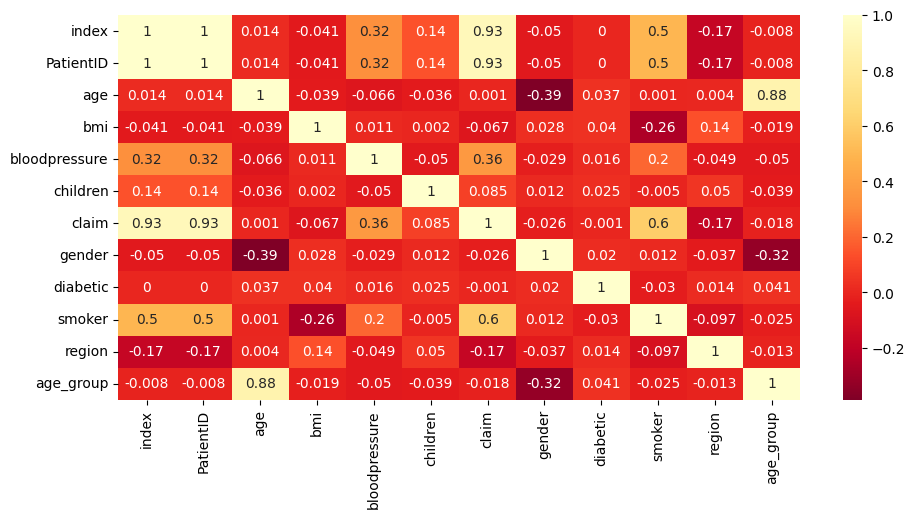

In [ ]:
## Correlation map
corr = main_df.corr(method='pearson').round(3)
plt.figure(figsize=(11,5))
sns.heatmap(corr, annot=True, cmap="YlOrRd_r")

In [ ]:
#POSITIVE CORRELATION(SKIN): When the correlation value is positive.
##EXAMPLE: Correlation between age and gender.
#NEGATIVE CORRELATION(RED) : When the correlation value is negative.
#EXAMPLE: Correlation between index and patientid


In [ ]:
# Segregating the Dependent Variables in X and Independent Variable in Y
X = main_df.drop(columns=["claim"])
y = main_df["claim"]

## standardize the price data values to avoid biased outcome of predictions
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [ ]:
## split the data

X_train, X_test, y_train, y_test = train_test_split(x_scaled ,y, test_size=0.2, random_state=0)

## create function to fit models

model_preds = []
def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred),4)
    adj_r2 = round(1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1), 4)
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
    model_preds.append([model_name, r2, adj_r2, mse, mae, rmse])
    print ("The R-Squared Value is: ", r2)
    print ("Adjusted R-Squared Value is: ", adj_r2)
    print("The Mean Squared error (MSE) is: ", mse)
    print("Root Mean Squared Error (RMSE): ", rmse)
    print("Mean Absolute Error (MAE) is: ", mae)

    ## model evaluation function
def model_eval():
    preds = pd.DataFrame(model_preds)
    preds.columns = ["Mod_Name", "R2 Value", "adj_R2", "MSE", "RMSE", "MAE"]
    return preds.sort_values(by="R2 Value", ascending=False)

In [ ]:
## Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

fit_model(lr_model, "Linear Regression")


The R-Squared Value is:  0.8836
Adjusted R-Squared Value is:  0.8825
The Mean Squared error (MSE) is:  6423662.7567
Root Mean Squared Error (RMSE):  2534.4946
Mean Absolute Error (MAE) is:  1659.7744


In [ ]:
## Decision Trees

dectree_model = DecisionTreeRegressor()
fit_model(dectree_model, "Decision Tree Regressor")

The R-Squared Value is:  0.9997
Adjusted R-Squared Value is:  0.9997
The Mean Squared error (MSE) is:  13820.9889
Root Mean Squared Error (RMSE):  117.5627
Mean Absolute Error (MAE) is:  46.5258


In [ ]:
## Random Forest

randfor_model = RandomForestRegressor()
fit_model(randfor_model, "Random Forest Regressor")

The R-Squared Value is:  0.9998
Adjusted R-Squared Value is:  0.9998
The Mean Squared error (MSE) is:  10906.9408
Root Mean Squared Error (RMSE):  104.4363
Mean Absolute Error (MAE) is:  33.8174


In [ ]:
## XG Boost

XGB_model = xgb.XGBRFRegressor()
fit_model(XGB_model, "XG Boost")

The R-Squared Value is:  0.9996
Adjusted R-Squared Value is:  0.9996
The Mean Squared error (MSE) is:  24238.3451
Root Mean Squared Error (RMSE):  155.6867
Mean Absolute Error (MAE) is:  91.2201


In [ ]:
## KNN

knn_model = KNeighborsRegressor(n_neighbors=6)
fit_model(knn_model, "K-Neigbors Regressor")

The R-Squared Value is:  0.8346
Adjusted R-Squared Value is:  0.8331
The Mean Squared error (MSE) is:  9125781.3569
Root Mean Squared Error (RMSE):  3020.8908
Mean Absolute Error (MAE) is:  1801.8234


In [ ]:
model_eval()

,Mod_Name,R2 Value,adj_R2,MSE,RMSE,MAE
2,Random Forest Regressor,0.9998,0.9998,1.090694e+04,33.8174,104.4363
1,Decision Tree Regressor,0.9997,0.9997,1.382099e+04,46.5258,117.5627
3,XG Boost,0.9996,0.9996,2.423835e+04,91.2201,155.6867
0,Linear Regression,0.8836,0.8825,6.423663e+06,1659.7744,2534.4946
4,K-Neigbors Regressor,0.8346,0.8331,9.125781e+06,1801.8234,3020.8908


In [ ]:

# Training the Model

modelETR = ExtraTreesRegressor()
modelETR.fit(X_train, y_train)

# Predict the model with test data

y_pred = XGB_model.predict(X_test)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=main_df.merge(out,left_index=True,right_index=True)

In [ ]:
result[['PatientID', 'age','bloodpressure','smoker','children','Price_actual','Price_pred']].sample(25)


,PatientID,age,bloodpressure,smoker,children,Price_actual,Price_pred
687,688,50.0,86,0,3,9620.33,9570.438477
1008,1009,60.0,97,1,0,16884.92,16704.976562
744,745,56.0,81,0,0,10564.88,10559.785156
706,707,28.0,86,0,1,9872.70,9796.307617
613,614,36.0,98,0,3,8538.29,8512.329102
789,790,49.0,84,0,3,11264.54,11271.348633
937,938,33.0,106,1,0,13747.87,13939.959961
587,588,54.0,100,0,1,8232.64,8211.989258
152,153,18.0,94,0,0,2523.17,2394.105957
159,160,30.0,94,0,0,2632.99,2708.991699


In [ ]:
main_df()



NameError: name 'main_df' is not defined